In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from test import call_all

Load CSV file


In [119]:
values_degrees = call_all()

Load CSV file
deg 1 lambda 1e-15
Degree 1, lambda 1e-15, Average loss training:  148252.016803
Degree 1, lambda 1e-15, Average loss test:  16485.7334571
Degree 1, lambda 1e-15, Average f1_score:  0.629941660517
deg 2 lambda 1e-15
Degree 2, lambda 1e-15, Average loss training:  135875.479112
Degree 2, lambda 1e-15, Average loss test:  63689.4343082
Degree 2, lambda 1e-15, Average f1_score:  0.677222254851
deg 3 lambda 1e-15
Degree 3, lambda 1e-15, Average loss training:  131595.056077
Degree 3, lambda 1e-15, Average loss test:  28550.4115678
Degree 3, lambda 1e-15, Average f1_score:  0.691328107297
deg 4 lambda 1e-15
Degree 4, lambda 1e-15, Average loss training:  129541.342109
Degree 4, lambda 1e-15, Average loss test:  793460125299.0
Degree 4, lambda 1e-15, Average f1_score:  0.69968422528
deg 5 lambda 1e-15
Degree 5, lambda 1e-15, Average loss training:  127369.212297
Degree 5, lambda 1e-15, Average loss test:  2.1737969148e+16
Degree 5, lambda 1e-15, Average f1_score:  0.70803277797

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as p

In [6]:
pickle.dump( values, open( "values.p", "wb" ) )

NameError: name 'pickle' is not defined

In [7]:
%matplotlib inline 

In [159]:
import matplotlib.patches as mpatches
def plot(data):
    fig1, ax1 = plt.subplots(1,1, figsize=(15,10))
    ax1.set_title("F1 Score with different Degree", fontsize=22)
    ax1.set_xlabel('Degree', fontsize=22)
    ax1.set_ylabel('F1 Score', fontsize=22)
    ax1.boxplot(data, showfliers=False, meanline=True, showmeans=True)
    ax1.tick_params(axis = 'both', labelsize = 18)
    ax1.set_xticklabels(list(map(lambda x: str(x), range(10,21))))
    
    plt.legend(fontsize = 16, loc = 3, handles = [mpatches.Patch(color='orange', label = 'Median'), mpatches.Patch(color='green', label = 'Mean')])
    plt.figure(figsize=(10, 10))
    plt.show()
    fig1.savefig('plot_10-20.png')   # save the figure to file
    plt.close(fig1)  

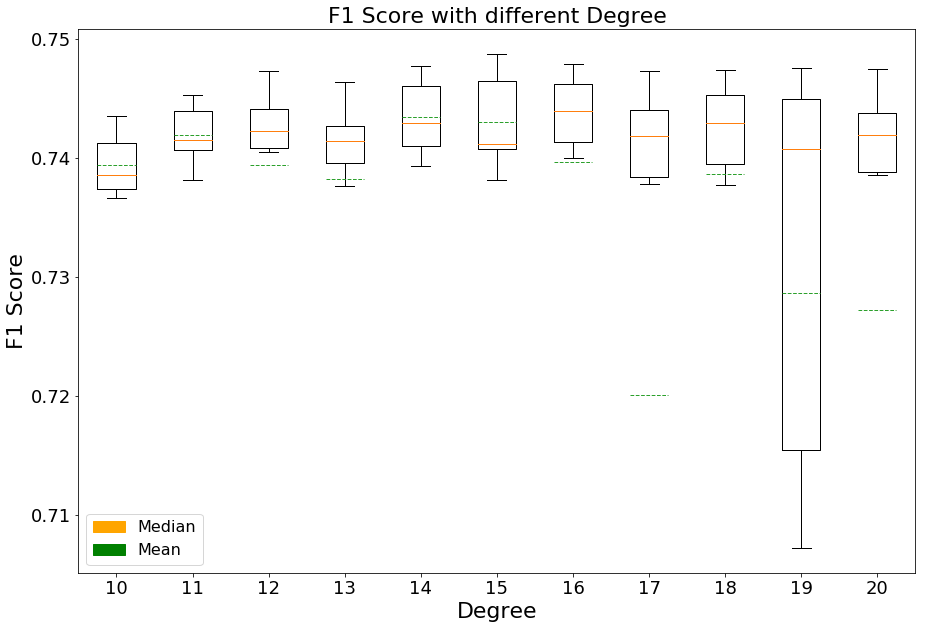

0.743464374899
4
[ 0.73944821  0.74198751  0.73942573  0.73821829  0.74346437  0.7430039
  0.73971682  0.72009641  0.7386361   0.72864248  0.72720823]


In [160]:
plot(list(map(lambda x: x[2], values_degrees[9:])))
print(np.max(np.average(list(map(lambda x: x[2], values_degrees[9:])), axis=1)))
print(np.argmax(np.average(list(map(lambda x: x[2], values_degrees[9:])), axis=1)))
print(np.average(list(map(lambda x: x[2], values_degrees[9:])), axis=1))

In [76]:
plot(list(map(lambda x: x.f1_scores, old_partition)))
np.max(np.average(list(map(lambda x: x.f1_scores, old_partition)), axis=1))

NameError: name 'old_partition' is not defined

In [ ]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
ax2.set_title('Test Error')
ax2.set_xlabel('Degree')
plt.figure(figsize=(10, 10))
data = list(map(lambda x: x.losses_test, abc[:7]))
ax2.boxplot(data, showfliers=False)
plt.figure(figsize=(10, 10))

In [ ]:
fig3, ax3 = plt.subplots(figsize=(15, 10))
ax3.set_title('Training Error')
ax3.set_xlabel('Degree')
ax3.boxplot(list(map(lambda x: x.losses_trainign, abc[:7])), showfliers=False)
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

degree = list(map(lambda x: str(x[0]), abc))
train = list(map(lambda x: str(x[1]), abc))
test = list(map(lambda x: str(x[2]), abc))

fig, ax1 = plt.subplots()

ax1.plot(degree, test, 'b-')
ax1.set_xlabel('degree')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('test-error', color='b')

ax2 = ax1.twinx()
ax2.plot(degree, train, 'r-')
ax2.set_ylabel('train-error', color='r')
plt.show()

In [ ]:
y_te, x_te, ids_te = load_csv_data("../data/train.csv")

In [ ]:
plt.hist(x_te[:, 1], 100, density=True, facecolor='g', alpha=0.75, log=True)
np.var(x_te[:, 1])

### Plot different degree and lambda

[9.9999999999999995e-21, 9.9999999999999998e-20, 1.0000000000000001e-18, 1.0000000000000001e-17, 9.9999999999999998e-17, 1.0000000000000001e-15, 1e-14, 1e-13, 9.9999999999999998e-13, 9.9999999999999994e-12, 1e-10, 1.0000000000000001e-09, 1e-08, 9.9999999999999995e-08, 9.9999999999999995e-07, 1.0000000000000001e-05, 0.0001, 0.001, 0.01, 0.10000000000000001]
5


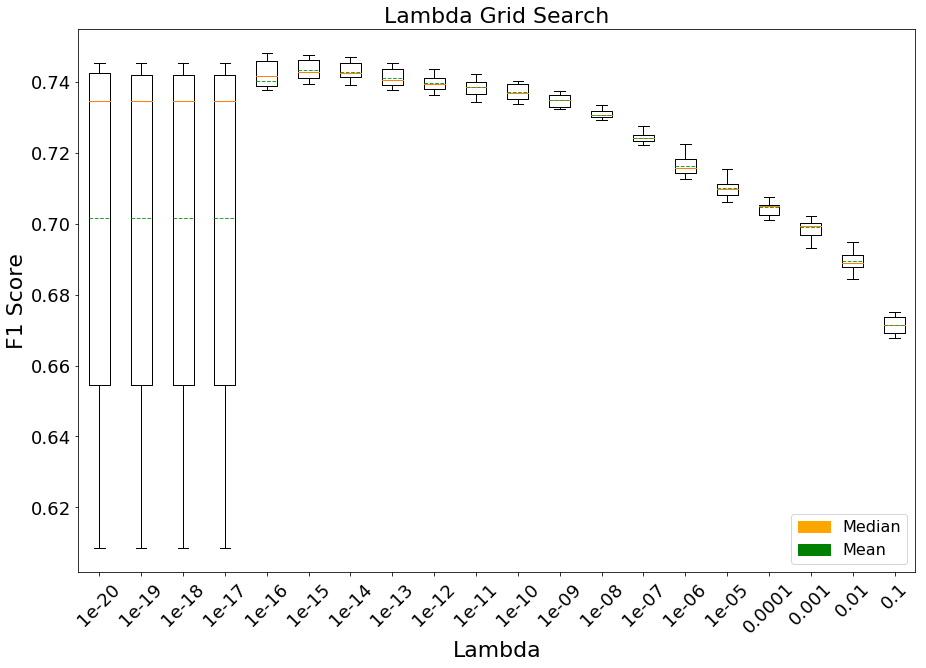

In [173]:
f1_scores = list(map(lambda x: x[2], values))
lambdas = list(map(lambda x:x[3], values))
print(lambdas)
print(np.argmax(np.average(f1_scores, axis=1)))

fig1, ax1 = plt.subplots(1,1, figsize=(15,10))
ax1.set_title("Lambda Grid Search", fontsize = 22)
ax1.set_xlabel('Lambda', fontsize=22)
ax1.set_ylabel('F1 Score', fontsize=22)
ax1.boxplot(f1_scores, showfliers=False, showmeans=True, meanline=True)
ax1.tick_params(axis = 'both', labelsize = 18)
ax1.set_xticklabels(lambdas)
plt.legend(fontsize = 16, loc = 4, handles = [mpatches.Patch(color='orange', label = 'Median'), mpatches.Patch(color='green', label = 'Mean')])

plt.xticks(rotation=45)
plt.figure(figsize=(10, 10))
plt.show()
fig1.savefig('plot_lambda_all.png')   # save the figure to file
plt.close(fig1)